## Data available, import from Google Drive
Run this if you have the csv file in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/mlai/

/content/drive/My Drive/mlai


## Data available, import

In [ ]:
from IPython.core.interactiveshell import InteractiveShell #allow printing multiple outputs per cell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib
import numpy

In [ ]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv", parse_dates=['date_time'])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:
df.nunique()

holiday                   12
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40575
traffic_volume          6704
dtype: int64

In [ ]:
df.weather_description.value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [ ]:
df.weather_main.value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [ ]:
df.weather_description.value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

## Data Cleaning

For more information on data profiling, this is what we have done for the previous assignment: https://colab.research.google.com/drive/1IloERKEaM_xcS5N0r0k08MlSthyvKo21#scrollTo=-r8BhZF5lCl5

### Eliminate values that are insignificant

In [ ]:
df.weather_main.value_counts() #same issue with the dataset in the slides, need to treat squalls

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [ ]:
 df = df.query( "weather_main != 'Squall' ")

### Eliminate outliers

In [ ]:
df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

####Removing outliers in rain_1h

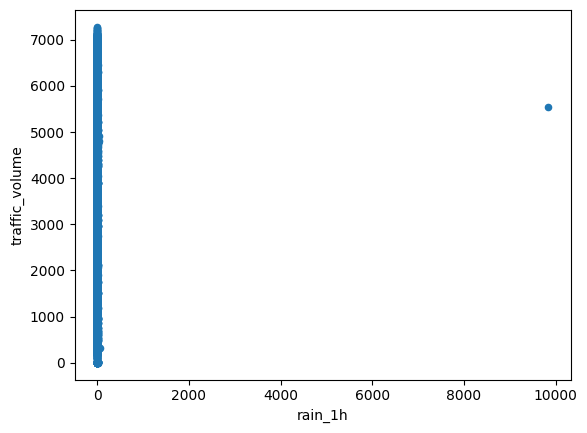

In [ ]:
scatterrain = df.plot.scatter( x = "rain_1h", y= "traffic_volume")

In [ ]:
df[(df['rain_1h']>50)] #here is the big outlier - row 24872 - likely a erroneous entry.

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8247,None,289.10,55.63,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
24872,None,302.11,9831.30,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


In [ ]:
df = df[df['rain_1h']<100] #remove row 24872

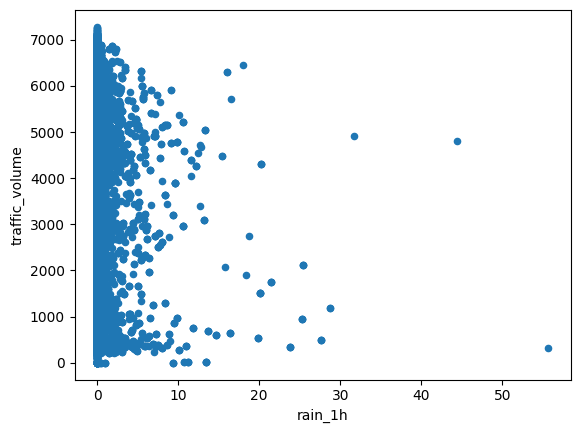

In [ ]:
scatterrain = df.plot.scatter( x = "rain_1h", y= "traffic_volume")

#### Removing outliers in temp

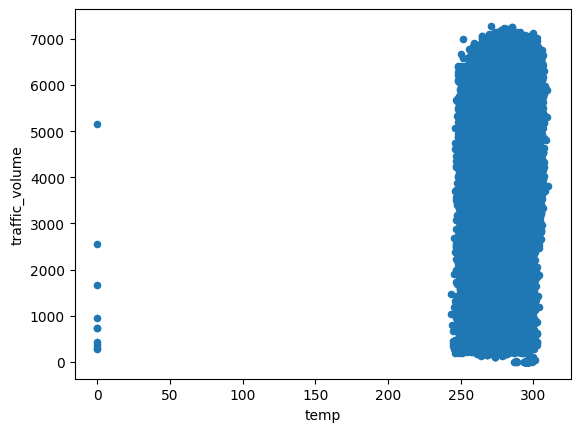

In [ ]:
scattertemp = df.plot.scatter( x = "temp", y= "traffic_volume") #temp being 0 is not possible, as these numbers are in kelvin.

In [ ]:
df[(df['temp']==0)] #10 lines of data with invalid temp.

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In [ ]:
df = df[(df['temp'] >= 184) & (df['temp'] <= 329)] #The highest and lowest temperature recorded on earth in Kelvin is 184 and 329. Therefore, any temperature outside of this bound is an outlier/

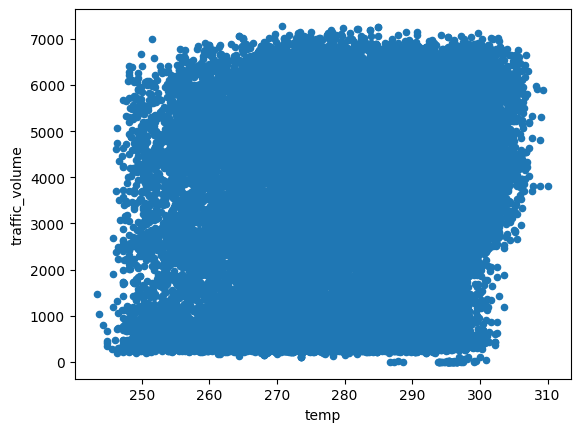

In [ ]:
scattertemp = df.plot.scatter( x = "temp", y= "traffic_volume")

### Data Transformation

#### Fixing skewed data

rain_1h is heavily skewed, can apply transformations to fix it.

The reason we decided to transform instead of turning rain binary was because

1: there are a lot more days with rain compared to snow_1h

2: varying amounts of rain should have an impact on traffic volume

rain_1h: apply λe^(−λx)

##### rain_1h

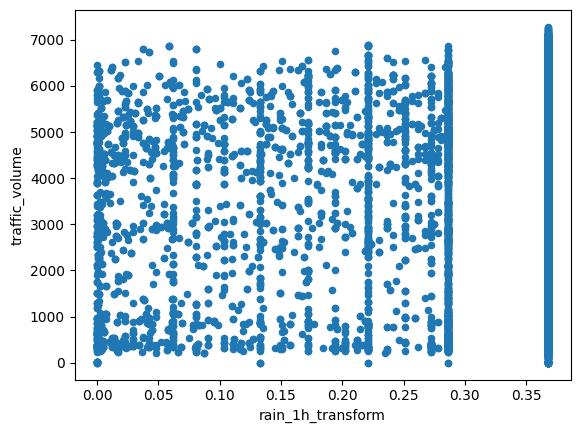

In [ ]:
df = df.copy() #just to prevent warning
constant = 1
df['rain_1h_transform'] = constant * numpy.exp(-constant*(df['rain_1h']+1))
# df['rain_1h_transform2'] = numpy.log10(df['rain_1h']+50)
scatterraintransform = df.plot.scatter( x = "rain_1h_transform", y= "traffic_volume")

(array([4.7915e+04, 1.9900e+02, 4.2000e+01, 1.6000e+01, 1.2000e+01,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  5.563, 11.126, 16.689, 22.252, 27.815, 33.378, 38.941,
        44.504, 50.067, 55.63 ]),
 <BarContainer object of 10 artists>)

(array([  672.,   289.,   232.,   253.,   239.,   179.,   449.,  1150.,
            0., 44726.]),
 array([2.54626435e-25, 3.67879441e-02, 7.35758882e-02, 1.10363832e-01,
        1.47151776e-01, 1.83939721e-01, 2.20727665e-01, 2.57515609e-01,
        2.94303553e-01, 3.31091497e-01, 3.67879441e-01]),
 <BarContainer object of 10 artists>)

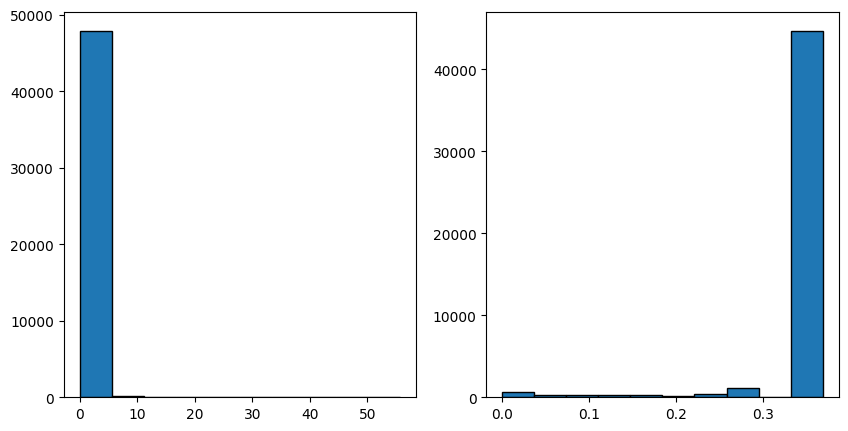

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
ax1.hist(df['rain_1h'], bins=10, edgecolor='black')
ax2.hist(df['rain_1h_transform'],bins=10,  edgecolor='black')
#honestly while it does look terrible, it makes sense since most of the data is 0 rain, all that was done was spread out the non zero rain values more.

#### Changing Features to binary

##### snow_1h
There are only 63 (0.13%) datetime that shows snow. Therefore, we have decided to change these values to binary to show whether it is snowing on the day

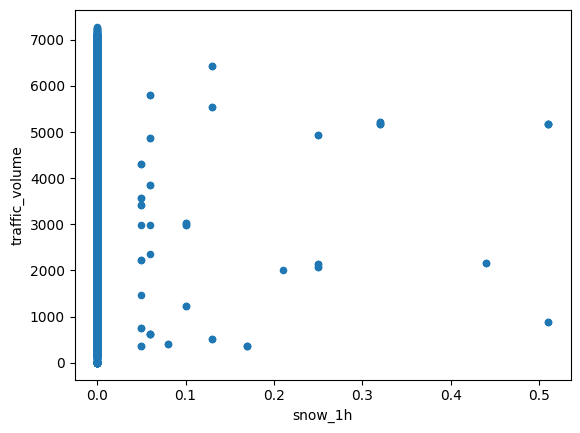

In [ ]:
scattersnow = df.plot.scatter( x = "snow_1h", y= "traffic_volume")

In [ ]:
print(df.snow_1h.value_counts())
df['isSnow'] = 0
df.loc[df['snow_1h'] != 0, 'isSnow'] = 1
print(df['isSnow'].value_counts())

0.00    48126
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6
0.10        6
0.32        5
0.17        3
0.44        2
0.08        2
0.21        1
Name: snow_1h, dtype: int64
0    48126
1       63
Name: isSnow, dtype: int64


##### Holiday
Since there is a column on holiday already, we do not need to use the pandas.tseries.holiday and check if there is a correlation between holiday. However, we are not interested in the kind of holiday. Therefore, we can add a new column isholiday and use it to model the prediction for traffic volume

In [ ]:
print(df['holiday'].value_counts())
df['isholiday'] = 0
df.loc[df['holiday'] != 'None', 'isholiday'] = 1
print(df['isholiday'].value_counts())

None                         48128
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64
0    48128
1       61
Name: isholiday, dtype: int64


#### Splitting data

##### Datetime


In [ ]:
df['year'] = df.date_time.dt.year
df['month'] = df.date_time.dt.month
df['dayofweek'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour

## Split and build Pipeline

We did not use weather description, need to check why

In [ ]:
import numpy
numpy.random.seed(28)

### Randomly split the data into half training, half testing, Payment as variable outcome
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,df.traffic_volume,test_size=0.5)


### Put features in a list
lstNum = ['temp', 'rain_1h_transform', 'clouds_all']
lstCat = ['weather_main', 'year', 'month', 'dayofweek','hour', 'isholiday', 'isSnow']

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

### Build a pipeline for the numerical variables that scale
pipeNum = Pipeline([
    ('selector',ColumnTransformer([('selector','passthrough',lstNum)])),
    ('scaler',StandardScaler())
])

### Build a pipeline for categorical variables
from sklearn.preprocessing import OneHotEncoder
pipeCat = Pipeline([
    ('selector',ColumnTransformer([('selector','passthrough',lstCat)])),
    ('encoder', OneHotEncoder(dtype=int, drop='first', sparse_output=False))
])

### A step to combine the features
from sklearn.pipeline import FeatureUnion
preprocessor = FeatureUnion([
    ('cat',pipeCat),
    ('num',pipeNum)
])

## Model Training

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeRf = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
],verbose=True)

pipeRf.fit(X_train,y_train)

predTrainRf = pipeRf.predict(X_train)
predTestRf = pipeRf.predict(X_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=  22.0s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['weather_main',
                                                                                                    'year',
                                                                                                    'month',
                                                                                                    'dayofweek',
                                                                                                    'hour',
                                                                                                    'isholiday',
                                                                                                    'isSnow'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['temp',
                                                                                                    'rain_1h_transform',
                                                                                                    'clouds_all'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', RandomForestRegressor())],
         verbose=True)

In [ ]:
import sklearn.metrics
sklearn.metrics.r2_score(y_train, predTrainRf)
print("\n")
sklearn.metrics.r2_score(y_test, predTestRf)

0.991398313913515

0.9422848067821795

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

pipeGbA = Pipeline([
    ('preprocessor',preprocessor),
    ('model',GradientBoostingRegressor())
],verbose=True)

In [ ]:
#code just to try run the pipeline once
pipeGbA.fit( X_train, y_train)
predTrainGbA = pipeGbA.predict( X_train )
predTestGbA = pipeGbA.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.9s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['weather_main',
                                                                                                    'year',
                                                                                                    'month',
                                                                                                    'dayofweek',
                                                                                                    'hour',
                                                                                                    'isholiday',
                                                                                                    'isSnow'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['temp',
                                                                                                    'rain_1h_transform',
                                                                                                    'clouds_all'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', GradientBoostingRegressor())],
         verbose=True)

In [ ]:
sklearn.metrics.r2_score( y_train, predTrainGbA )
print("\n")
sklearn.metrics.r2_score( y_test, predTestGbA )

0.824050296664168

0.8233219034692995

### Neural Networks

#### Neural Network with with 2 hidden layer with 10 nodes each

In [ ]:
from sklearn.neural_network import MLPRegressor
pipeNn1010 = Pipeline([
    ('preprocessor',preprocessor),
    ('model',MLPRegressor(hidden_layer_sizes=(10,10)))
],verbose = True)


pipeNn1010.fit(X_train,y_train)

predTrainNn1010 = pipeNn1010.predict(X_train)
predTestNn1010 = pipeNn1010.predict(X_test)


[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['weather_main',
                                                                                                    'year',
                                                                                                    'month',
                                                                                                    'dayofweek',
                                                                                                    'hour',
                                                                                                    'isholiday',
                                                                                                    'isSnow'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['temp',
                                                                                                    'rain_1h_transform',
                                                                                                    'clouds_all'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', MLPRegressor(hidden_layer_sizes=(10, 10)))],
         verbose=True)

In [ ]:
sklearn.metrics.r2_score( y_train, predTrainNn1010 )
print("\n")
sklearn.metrics.r2_score( y_test, predTestNn1010 )

0.9393260085148644

0.9413872175873924

#### Neural Network with with 3 hidden layer with 100 nodes each

In [ ]:
pipeNnCCC = Pipeline([
    ('preprocessor',preprocessor),
    ('model',MLPRegressor(hidden_layer_sizes=(100,100,100)))
],verbose = True)


pipeNnCCC.fit(X_train,y_train)

predTrainNnCCC = pipeNnCCC.predict(X_train)
predTestNnCCC = pipeNnCCC.predict(X_test)


[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.0min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['weather_main',
                                                                                                    'year',
                                                                                                    'month',
                                                                                                    'dayofweek',
                                                                                                    'hour',
                                                                                                    'isholiday',
                                                                                                    'isSnow'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['temp',
                                                                                                    'rain_1h_transform',
                                                                                                    'clouds_all'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', MLPRegressor(hidden_layer_sizes=(100, 100, 100)))],
         verbose=True)

In [ ]:
sklearn.metrics.r2_score( y_train, predTrainNnCCC )
print("\n")
sklearn.metrics.r2_score( y_test, predTestNnCCC )

0.9688292929489256

0.949068886776201

interaction

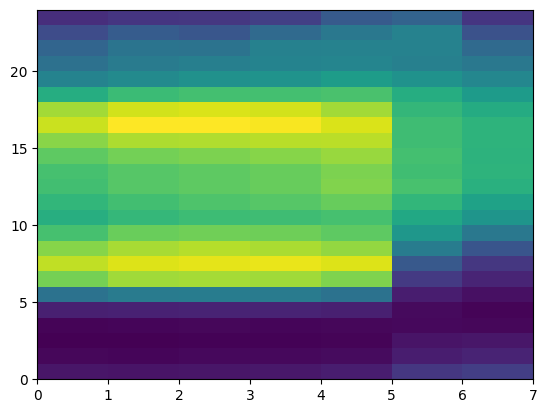

In [ ]:
# interaction pivot table

pivot = pd.pivot_table(df, index='hour', columns='dayofweek', values='traffic_volume')
map = plt.pcolormesh( pivot )

In [ ]:
# interact hour and day of week
# would expect different volume of traffic for each hour depending on the day of week
# weekday rush hour vs weekend

from sklearn.preprocessing import PolynomialFeatures
lstInteract = ['dayofweek','hour']

pipeInteract1 = Pipeline([
    ('selector', ColumnTransformer([ ("selector", 'passthrough', lstInteract ) ] )),
    ('encoder', OneHotEncoder( dtype=int, drop='first' ) ),
    ('interact', PolynomialFeatures( degree=2, interaction_only=True ) )
])

preprocessor2 = FeatureUnion([
    ('cat', pipeCat ),
    ('int', pipeInteract1 ),
    ('num', pipeNum )
])



pipeNnCCCi = Pipeline([
    ('preprocessor', preprocessor2 ),
    ('model',MLPRegressor(hidden_layer_sizes=(100,100,100) ) )
], verbose = True)

pipeNnCCCi.fit( X_train, y_train )
predTrainNnCCCi = pipeNnCCCi.predict(X_train)
predTestNnCCCi = pipeNnCCCi.predict(X_test)

sklearn.metrics.r2_score( y_train, predTrainNnCCCi )
sklearn.metrics.r2_score( y_test, predTestNnCCCi )
# still not better than nnCCC

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 3.5min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['weather_main',
                                                                                                    'year',
                                                                                                    'month',
                                                                                                    'dayofweek',
                                                                                                    'hour',
                                                                                                    'isholiday',
                                                                                                    'isSnow'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('int',
                                                 Pipeline(steps=[('selector',
                                                                  C...
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>)),
                                                                 ('interact',
                                                                  PolynomialFeatures(interaction_only=True))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['temp',
                                                                                                    'rain_1h_transform',
                                                                                                    'clouds_all'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', MLPRegressor(hidden_layer_sizes=(100, 100, 100)))],
         verbose=True)

0.9721620301321294

0.9454010557198437

tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# sklearn page for mlpregressor: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# i got an error when i tried tuning on solver
# 'solver': ['lbfgs', 'sgd', 'adam']



paramGridNn = {'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
}

gridNn = GridSearchCV( pipeNnCCC, paramGridNn, cv=5, n_jobs=-1 )
gridNn.fit( X_train, y_train )

gridNn.best_params_
gridNn.best_score_

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[Pipeline] ............. (step 2 of 2) Processing model, total= 2.2min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        FeatureUnion(transformer_list=[('cat',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['weather_main',
                                                                                                                           'year',
                                                                                                                           'month',
                                                                                                                           'dayofweek',
                                                                                                                           'hour',
                                                                                                                           'isholiday',
                                                                                                                           'isSnow'])])),
                                                                                        ('encoder',
                                                                                         OneHotEncoder(drop='first',
                                                                                                       dtype=<class 'int'>,
                                                                                                       sparse_output=False))])),
                                                                       ('num',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['temp',
                                                                                                                           'rain_1h_transform',
                                                                                                                           'clouds_all'])])),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('model',
                                        MLPRegressor(hidden_layer_sizes=(100,
                                                                         100,
                                                                         100)))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'model__activation': ['identity', 'logistic', 'tanh',
                                               'relu']})

{'model__activation': 'relu'}

0.9468657055980767

## Evaluating data (To be done after fine tuning details)

Given the data we want to predict has a lot of small values, any score that involves percentages will be way off, as anything divided by a small number will result in large values.

#### R squared score

In [ ]:
# print("R^2 score for Random Forest (train)", sklearn.metrics.r2_score(y_train, predTrainRf))
print("R^2 score for Random Forest (train)", sklearn.metrics.r2_score(y_train, predTrainRf))
print("R^2 score for Random Forest (test)", sklearn.metrics.r2_score(y_test, predTestRf))

print("R^2 score for Gradient Boosting (train)", sklearn.metrics.r2_score(y_train, predTrainGbA))
print("R^2 score for Gradient Boosting (test)", sklearn.metrics.r2_score(y_test, predTestGbA))

print("R^2 score for Neural Network-10,10 (train)", sklearn.metrics.r2_score(y_train, predTrainNn1010))
print("R^2 score for Neural Network-10,10 (test)", sklearn.metrics.r2_score(y_test, predTestNn1010))

print("R^2 score for Neural Network-100,100,100 (train)", sklearn.metrics.r2_score(y_train, predTrainNnCCC))
print("R^2 score for Neural Network-100,100,100 (test)", sklearn.metrics.r2_score(y_test, predTestNnCCC))

print("R^2 score for Neural Network-100,100,100 with interaction (train)", sklearn.metrics.r2_score(y_train, predTrainNnCCCi))
print("R^2 score for Neural Network-100,100,100 with interaction (test)", sklearn.metrics.r2_score(y_test, predTestNnCCCi))



R^2 score for Random Forest (train) 0.991398313913515
R^2 score for Random Forest (test) 0.9422848067821795
R^2 score for Gradient Boosting (train) 0.824050296664168
R^2 score for Gradient Boosting (test) 0.8233219034692995
R^2 score for Neural Network-10,10 (train) 0.9393260085148644
R^2 score for Neural Network-10,10 (test) 0.9413872175873924
R^2 score for Neural Network-100,100,100 (train) 0.9688292929489256
R^2 score for Neural Network-100,100,100 (test) 0.949068886776201
R^2 score for Neural Network-100,100,100 with interaction (train) 0.9721620301321294
R^2 score for Neural Network-100,100,100 with interaction (test) 0.9454010557198437


#### Mean absolute Error


In [ ]:
print("Mean Absolute Error for Random Forest (train)",sklearn.metrics.mean_absolute_error(y_train, predTrainRf))
print("Mean Absolute Error for Random Forest (test)",sklearn.metrics.mean_absolute_error(y_test, predTestRf))

print("Mean Absolute Error for Gradient Boosting (train)",sklearn.metrics.mean_absolute_error(y_train, predTrainGbA))
print("Mean Absolute Error for Gradient Boosting (test)",sklearn.metrics.mean_absolute_error(y_test, predTestGbA))

print("Mean Absolute Error for Neural Network-10,10 (train)",sklearn.metrics.mean_absolute_error(y_train, predTrainNn1010))
print("Mean Absolute Error for Neural Network-10,10 (test)",sklearn.metrics.mean_absolute_error(y_test, predTestNn1010))

print("Mean Absolute Error for Neural Network-100,100,100 (train)",sklearn.metrics.mean_absolute_error(y_train, predTrainNnCCC))
print("Mean Absolute Error for Neural Network-100,100,100 (test)",sklearn.metrics.mean_absolute_error(y_test, predTestNnCCC))

Mean Absolute Error for Random Forest (train) 100.19900476605517
Mean Absolute Error for Random Forest (test) 263.7165271494777
Mean Absolute Error for Gradient Boosting (train) 624.1294189730695
Mean Absolute Error for Gradient Boosting (test) 620.7355964629262
Mean Absolute Error for Neural Network-10,10 (train) 289.8014536844265
Mean Absolute Error for Neural Network-10,10 (test) 285.89071914147775
Mean Absolute Error for Neural Network-100,100,100 (train) 220.36348131074402
Mean Absolute Error for Neural Network-100,100,100 (test) 278.0623241193836


#### Mean Squared Error

In [ ]:
print("Mean Squared Error for Random Forest (train)",sklearn.metrics.mean_squared_error(y_train, predTrainRf))
print("Mean Squared Error for Random Forest (test)",sklearn.metrics.mean_squared_error(y_test, predTestRf))

print("Mean Squared Error for Gradient Boosting (train)",sklearn.metrics.mean_squared_error(y_train, predTrainGbA))
print("Mean Squared Error for Gradient Boosting (test)",sklearn.metrics.mean_squared_error(y_test, predTestGbA))

print("Mean Squared Error for Neural Network-10,10 (train)",sklearn.metrics.mean_squared_error(y_train, predTrainNn1010))
print("Mean Squared Error for Neural Network-10,10 (test)",sklearn.metrics.mean_squared_error(y_test, predTestNn1010))

print("Mean Squared Error for Neural Network-100,100,100 (train)",sklearn.metrics.mean_squared_error(y_train, predTrainNnCCC))
print("Mean Squared Error for Neural Network-100,100,100 (test)",sklearn.metrics.mean_squared_error(y_test, predTestNnCCC))

Mean Squared Error for Random Forest (train) 34214.20111998976
Mean Squared Error for Random Forest (test) 226044.06812971886
Mean Squared Error for Gradient Boosting (train) 699860.2920877644
Mean Squared Error for Gradient Boosting (test) 691967.4606041781
Mean Squared Error for Neural Network-10,10 (train) 241337.8175572627
Mean Squared Error for Neural Network-10,10 (test) 229559.5153072621
Mean Squared Error for Neural Network-100,100,100 (train) 123985.09191975684
Mean Squared Error for Neural Network-100,100,100 (test) 199473.923339966


#### Median Absolute Error

In [ ]:
print("Median Absolute Error for Random Forest (train)",sklearn.metrics.median_absolute_error(y_train, predTrainRf))
print("Median Absolute Error for Random Forest (test)",sklearn.metrics.median_absolute_error(y_test, predTestRf))

print("Median Absolute Error for Gradient Boosting (train)",sklearn.metrics.median_absolute_error(y_train, predTrainGbA))
print("Median Absolute Error for Gradient Boosting (test)",sklearn.metrics.median_absolute_error(y_test, predTestGbA))

print("Median Absolute Error for Neural Network-10,10 (train)",sklearn.metrics.median_absolute_error(y_train, predTrainNn1010))
print("Median Absolute Error for Neural Network-10,10 (test)",sklearn.metrics.median_absolute_error(y_test, predTestNn1010))

print("Median Absolute Error for Neural Network-100,100,100 (train)",sklearn.metrics.median_absolute_error(y_train, predTrainNnCCC))
print("Median Absolute Error for Neural Network-100,100,100 (test)",sklearn.metrics.median_absolute_error(y_test, predTestNnCCC))

Median Absolute Error for Random Forest (train) 50.54500000000007
Median Absolute Error for Random Forest (test) 138.32999999999993
Median Absolute Error for Gradient Boosting (train) 464.015818090581
Median Absolute Error for Gradient Boosting (test) 466.2253194210723
Median Absolute Error for Neural Network-10,10 (train) 176.89267366666456
Median Absolute Error for Neural Network-10,10 (test) 177.68883484334856
Median Absolute Error for Neural Network-100,100,100 (train) 142.20835853827595
Median Absolute Error for Neural Network-100,100,100 (test) 178.11851423164444


#### Mean absolute percentage Error

In [ ]:
print("Mean Absolute Percentage Error for Random Forest (train)",sklearn.metrics.mean_absolute_percentage_error(y_train, predTrainRf))
print("Mean Absolute Percentage Error for Random Forest (test)",sklearn.metrics.mean_absolute_percentage_error(y_test, predTestRf))

print("Mean Absolute Percentage Error for Gradient Boosting (train)",sklearn.metrics.mean_absolute_percentage_error(y_train, predTrainGbA))
print("Mean Absolute Percentage Error for Gradient Boosting (test)",sklearn.metrics.mean_absolute_percentage_error(y_test, predTestGbA))

print("Mean Absolute Percentage Error for Neural Network-10,10 (train)",sklearn.metrics.mean_absolute_percentage_error(y_train, predTrainNn1010))
print("Mean Absolute Percentage Error for Neural Network-10,10 (test)",sklearn.metrics.mean_absolute_percentage_error(y_test, predTestNn1010))

print("Mean Absolute Percentage Error for Neural Network-100,100,100 (train)",sklearn.metrics.mean_absolute_percentage_error(y_train, predTrainNnCCC))
print("Mean Absolute Percentage Error for Neural Network-100,100,100 (test)",sklearn.metrics.mean_absolute_percentage_error(y_test, predTestNnCCC))

Mean Absolute Percentage Error for Random Forest (train) 164403629627862.72
Mean Absolute Percentage Error for Random Forest (test) 675171731145794.4
Mean Absolute Percentage Error for Gradient Boosting (train) 401412211603572.56
Mean Absolute Percentage Error for Gradient Boosting (test) 724049847471794.5
Mean Absolute Percentage Error for Neural Network-10,10 (train) 309642874409525.0
Mean Absolute Percentage Error for Neural Network-10,10 (test) 691011977951157.5
Mean Absolute Percentage Error for Neural Network-100,100,100 (train) 235436617300883.94
Mean Absolute Percentage Error for Neural Network-100,100,100 (test) 541997512722122.94
